<a href="https://colab.research.google.com/github/VorobyvEgor/Data_Science_with_Python/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Задание №1**. Предположим, что у вас в базе есть табличка с балансом по всем счетам клиента на конец дня. Из-за особенностей построения таблицы, часть значений незаполнена и физически это означает отсутствие информации об изменении баланса. Для простоты будем считать, пропущенные значения для одного пользователя не могут встретиться между двумя заполненными. Напишите SQL запрос для заполнения неизвестных значений по каждому клиенту последним известным.

client_id |date | value
--- | --- | ---
1 | 14.04.2020 | 10000
1 | 15.04.2020 | 5000
1 | 16.04.2020 | NaN
1 | 17.04.2020 | NaN
1 | 18.04.2020 | NaN
2 | 14.04.2020 | 250000
2 | 15.04.2020 | 250000
2 | 16.04.2020 | 230000
2 | 17.04.2020 | 230000
2 | 18.04.2020 | 225000
3 | 14.04.2020 | 50000
3 | 15.04.2020 | NaN
3 | 16.04.2020 | NaN
3 | 17.04.2020 | NaN
3 | 18.04.2020 | NaN


In [ ]:
select clients.client_id, clients.date,
case when clients.value is not NULL then clients.value else new_table.value end as value
from (
select client_id, max(date), value
from clients
where value is not NULL
group by client_id) new_table
left join clients on clients.client_id = new_table.client_id;

### **Задание №1.1 (*)**. В прошлом задании мы считали, что пропущенные значения не могут находиться между двумя заполненными в рамках одного пользователя, что не всегда правда в реальных задачах. Напишите теперь SQL запрос без указанного допущения.

client_id |date | value
--- | --- | ---
1 | 14.04.2020 | 10000
1 | 15.04.2020 | 5000
1 | 16.04.2020 | NaN
1 | 17.04.2020 | 7000
1 | 18.04.2020 | NaN
2 | 14.04.2020 | 250000
2 | 15.04.2020 | 250000
2 | 16.04.2020 | 230000
2 | 17.04.2020 | 230000
2 | 18.04.2020 | 225000
3 | 14.04.2020 | 50000
3 | 15.04.2020 | NaN
3 | 16.04.2020 | NaN
3 | 17.04.2020 | 49000
3 | 18.04.2020 | NaN

In [ ]:
# <YOUR_CODE_HERE>

### **Задание №2**. Пусть клиенты обладают рядом статусов, закодированных цифрами: 0 - "улица", 1 - "зарплатник", 2 - "премиум", 3 - "пенсионер", 4 - "студент". У нас есть матрица с логами смен статусов за некоторый период, разверните ее в матрицу статус - статус с частотами перехода между ними.

Пример, как было:

client_id | prev_segment | new_segment|
--- | --- | ---
1 | 0 | 1
2 | 0 | 2
3 | 4 | 3

Пример, как нужно:

segment |0 | 1 | 2 | 3 | 4 
--- | --- | --- | --- | --- | ---
0 | 0 | 0.5 | 0.5 | 0 | 0 
1 | 0 |0 | 0 | 0 | 0
2 | 0 | 0 | 0 | 0 | 0
3 | 0 | 0 | 0 | 0 | 0
4 | 0 | 0 | 0 | 1 | 0

В процессе выполнения задания разрешается пользоваться библиотеками numpy и pandas.

In [ ]:
import numpy as np
import pandas as pd

# Сгенерируем данные для задачи
data = pd.DataFrame(
    np.random.randint(low=0, high=4, size=(50000000, 2)),
    columns=['prev_segment', 'new_segment']
)

data_new = data.value_counts().reset_index()
data_new = pd.pivot_table(data_new, index='prev_segment', columns='new_segment', dropna=False)
freq = data_new.apply(lambda x: x / data_new.sum(axis=1)).fillna(0)
freq.values

array([[0.25000876, 0.25008117, 0.24998236, 0.24992771],
       [0.24989853, 0.2499985 , 0.2500592 , 0.25004377],
       [0.24998742, 0.24985248, 0.25022747, 0.24993263],
       [0.24991505, 0.24989521, 0.25004805, 0.25014168]])

In [ ]:
data.head()

,prev_segment,new_segment
0,2,0
1,0,2
2,2,0
3,0,0
4,1,2


In [ ]:
data.prev_segment.unique()

array([2, 0, 1, 3])

In [ ]:
data.new_segment.unique()

array([0, 2, 1, 3])

Судя по тому, что уникальные значения от 0 до 3, верхнюю границу при определении DataFrame нужно увелисить на 1. Но я этого не делал, задание выполнено с начальным условием, при изменении верхней границы, код так же работает.

Считаем, какое количество различных переходов присутствует в таблице. Код не учитывает того, что могут отстутвовать какие-либо пары переходов. При таком размере матрицы (50000000, 2) это почти невозможно.

In [ ]:
data_new = data.value_counts().reset_index()

In [ ]:
data_new.head()

,prev_segment,new_segment,0
0,1,1,3129528
1,1,0,3127423
2,2,3,3126457
3,2,0,3126403
4,0,1,3125956


Создаем сводную таблицу pivot_table.

В таблице указано количество каждого перехода.

In [ ]:
data_new = pd.pivot_table(data_new, index='prev_segment', columns='new_segment', dropna=False)

In [ ]:
data_new.head()

0                           
new_segment        0        1        2        3
0            3123976  3125956  3124936  3122391
1            3127423  3129528  3125078  3125308
2            3126403  3124920  3123802  3126457
3            3123822  3124001  3122102  3123897

Создаем DataFrame с относительными частотами переходов.

Для этого используем функцию apply, которой передаем lambda функцию.

In [ ]:
freq = data_new.apply(lambda x: x / data_new.sum(axis=1)).fillna(0)

In [ ]:
freq.values

array([[0.24997289, 0.25013133, 0.25004971, 0.24984607],
       [0.25004707, 0.25021537, 0.24985958, 0.24987797],
       [0.25008059, 0.24996196, 0.24987254, 0.25008491],
       [0.25002933, 0.25004366, 0.24989167, 0.25003534]])

### **Задание №2.1 (*)**. Если вы не пользовались библиотечными функциями и реализовывали алгоритм самостоятельно, напишите, пожалуйста, его асимптотическую сложность в терминах O-большое.

Асимптотическая сложность алгоритма определяется как $O(n^x)$, где $х$ - сложность самой медленной конструкции, $n$ - количество итераций самой медленной конструкции. Например для одного цикла $x = 1$, для цикла в цикле $x = 2$ и тд.

В моей программе самая сложная конструкция это цикл в цикле и количество итераций в ней 50000000. Соответственно, $O(n^x) = 50000000^2$.

In [ ]:
import numpy as np
import pandas as pd

# Сгенерируем данные для задачи
data = pd.DataFrame(
    np.random.randint(low=0, high=4, size=(50000000, 2)),
    columns=['prev_segment', 'new_segment']
)

Считываем матрицу.

In [ ]:
df = data.values

Создаем одномерный массив всех переходов в строковом формате.

In [ ]:
all = []
for i in df:
  s = ''
  for j in i:
    s += str(j)
  all.append(s)

In [ ]:
Создаем словарь с количеством переходов.

In [ ]:
d = {}
for i in set(all):
  if i not in d.keys():
    d[i] = all.count(i)

Создаем матрицу нулей для заполнения.

In [ ]:
result = []
for i in range(int(len(set(all)) / 4)):
  row = []
  for j in range(int(len(set(all)) / 4)):
    row.append(0)
  result.append(row)
result

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

Заполняем матрицу количеством соответствующих переходов.

In [ ]:
for key in sorted(d.keys()):
  row, col = [int(i) for i in list(key)]
  result[row][col] = d[key]
for row in result:
  print(row)

[3126962, 3129628, 3121833, 3126381]
[3126784, 3125969, 3122747, 3126380]
[3124033, 3120907, 3122975, 3120985]
[3125814, 3125901, 3127288, 3125413]


Делим каждое значение на самму значений в соответствующей строке и получаем матрицу относительных частот.

In [ ]:
for row in range(len(result)):
  ddel = sum(result[row])
  for col in range(len(result)):
    result[row][col] = result[row][col] / ddel

Выводим матрицу.

In [ ]:
for row in result:
  print(row)

[0.25006085661158706, 0.25027405467530717, 0.24965069424518768, 0.25001439446791807]
[0.25010510419232945, 0.25003991399693487, 0.24978219275820918, 0.2500727890525265]
[0.25014476855447637, 0.24989446628606202, 0.2500600533273547, 0.2499007118321069]
[0.2499768081932015, 0.24998376573524106, 0.2500946865491359, 0.24994473952242152]


### **Задание №3**. Постройте прогнозую модель для датасета с UCI Machine Learning: предобработайте категориальные фичи, отберите их, соберите схему валидации и отберите модели с помощью нее. Описание датасета по ссылке: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

Данная задача multilabel multiclass classification, поэтому предлагаю начать с одного из подходов:
- Свести задачу к multilabel binary classification, как это указано в описании к датасету;
- Свести задачку к binary classification тем или иным способом;
- Обучить множество multiclass/binary classification моделей;
- Что-то еще, что придет в голову.


In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data

--2022-01-18 17:24:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 346695 (339K) [application/x-httpd-php]
Saving to: ‘drug_consumption.data’

drug_consumption.da 100%[===================>] 338.57K  1.35MB/s    in 0.2s    

2022-01-18 17:24:21 (1.35 MB/s) - ‘drug_consumption.data’ saved [346695/346695]



In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('drug_consumption.data', header=None, index_col=0)
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


Импортируем библиотеки.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score

Посмотрим на матрицу фией и результатов.

In [ ]:
X = data.drop(range(13, 32), axis=1)

In [ ]:
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575


In [ ]:
y = data[range(13, 32)]

In [ ]:
y.head()

,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,,,,,,,,,,,,,,,,,,,
1,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


Сведем задачу к multilabel binary classification, как это указано в описании к датасету.

In [ ]:
y_multi = y.applymap(lambda x: 0 if x == 'CL0' or x == 'CL1' else 1)

In [ ]:
y_multi.head()

,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,,,,,,,,,,,,,,,,,,,
1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0,0
3,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0
5,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0


Разделим наш датасет на обучающую и тестовую выборки.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_multi, test_size=0.3, random_state=0)

In [ ]:
X_train.shape

(1319, 12)

In [ ]:
X_test.shape

(566, 12)

Применим подход OneVsRestClassifier, он является одним из самых популярных подходов для мультиклассовой классификации.

In [ ]:
clf = OneVsRestClassifier(RandomForestClassifier())

In [ ]:
from sklearn.svm import LinearSVC

Посмотрим, какой классификатор из LinearSVC и RandomForestClassifier лучше всего решит данную задачу.

In [ ]:
for base_clf in (LinearSVC(random_state=0),
                 RandomForestClassifier()):
        clf = OneVsRestClassifier(base_clf).fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(base_clf, f1_score(y_pred, y_test, average='samples'))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(random_state=0) 0.7993447714026446
RandomForestClassifier() 0.7903585736453609


С данной задачей лучше всего справляется LinearSVC.



In [ ]:
clf_onevsrest_linsvc = OneVsRestClassifier(LinearSVC(random_state=0))

In [ ]:
clf_onevsrest_linsvc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


OneVsRestClassifier(estimator=LinearSVC(random_state=0))

Сделаем предсказание для тестовой выбоки.

In [ ]:
predict = clf_onevsrest_linsvc.predict(X_test)

Оценим полученный результат с помощью F-меры.

In [ ]:
f1_score(predict, y_test, average='samples')

0.7993447714026446

Сведем задачу к задаче бинарной классификации. Предлагаю такие варианты:
 
  - разделить все наблюдения на те, которые принимали наркотики и тех кто их не принимал;
  - разделить показания, на тех, которые являются "жесткими" наркоманами, то есть употребляли наркотики за последние 2 месяца;

Обработаем вектор результатов и создадим 2 вектора для сформулированной квалификации.

Согласно описанию DataFrame накркотики находятся в столбцах 14, 15, 16, 18, 20, 21, 22, 23, 24, 26, 27, 28, 30. Посмотрим у кого из пользоватиелей сумма по этим столбцам равно 0 (эти рользователи получают класс 1 - ринимали), остальные класс 0 - не принимали. За основу взята матрица полученная для multilabel binary classification.

In [ ]:
y_never = (y_multi[[14, 15, 16, 18, 20, 21, 22, 23, 24, 26, 27, 28, 30]].apply(sum, axis=1) == 0).astype(int)

In [ ]:
y_never.head()

0
1    0
2    0
3    0
4    0
5    0
dtype: int64

Определим "жестких" наркоманов, то есть тех, кто принимал наркотики за последние 2 месяца.



In [ ]:
y_nark = (y[[14, 15, 16, 18, 20, 21, 22, 23, 24, 26, 27, 28, 30]] == 'CL6') | (y[[14, 15, 16, 18, 20, 21, 22, 23, 24, 26, 27, 28, 30]] == 'CL5') | (y[[14, 15, 16, 18, 20, 21, 22, 23, 24, 26, 27, 28, 30]] == 'CL4')

In [ ]:
y_nark = (y_nark.apply(sum, axis=1) == 0).astype(int)

Здесь получается обратная ситуация, в силу особенной логического разделения. 1 - принимал за послдение 2 месяца, 0 - не принимал.

In [ ]:
y_nark.head()

0
1    1
2    0
3    1
4    1
5    1
dtype: int64

Для простой бинарной классификации опробуем 3 подхода:

  - DecisionTreeClassifier;
  - LinearSVC;
  - RandomTreeClassifier.

  Для деревьев порробуем подобрать наилучшую модель прогнозирования (используем GridSearchCV для поиска наилучших параметров модели).

Создадим и оценим модели для первого варианта классификации.

Первое, что нужно сделать, получить тренировочную и тестовую выборки.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_never, test_size=0.3, random_state=0)

Создадим модель и подберем параметры для нее.

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 15),
    'min_samples_split': range(2, 11, 2),
    'min_samples_leaf': range(1, 10)
}

In [ ]:
search = GridSearchCV(clf, params, n_jobs=-1)

In [ ]:
search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 15),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 11, 2)})

Получили следущие лучшие параметры для модели.

In [ ]:
search.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 9,
 'min_samples_split': 2}

In [ ]:
best_clf = search.best_estimator_

Сделаем предсказание.

In [ ]:
y_pred_clf = best_clf.predict(X_test)

In [ ]:
f1_score(y_pred_clf, y_test)

0.5695364238410596

Получили не самый высокий показатель.

Обучим следующую модель. Случайный лес.

In [ ]:
for_clf = RandomForestClassifier()

In [ ]:
params = {
    'n_estimators': range(10, 100, 10),
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 7, 2)
}

In [ ]:
search = GridSearchCV(for_clf, params, n_jobs=-1)

In [ ]:
search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_split': range(2, 7, 2),
                         'n_estimators': range(10, 100, 10)})

Получили следущие лучшие параметры для модели.

In [ ]:
search.best_params_

{'max_depth': 9, 'min_samples_split': 2, 'n_estimators': 20}

Сделаем предсказание.

In [ ]:
best_for_clf = search.best_estimator_

In [ ]:
y_pred_for_clf = best_for_clf.predict(X_test)

In [ ]:
f1_score(y_pred_for_clf, y_test)

0.6202090592334495

Модель показывает резудьтаты лучше, чем обычное дерево, но не очень сильно.

Обучим еще одну модель на тех же даных.

In [ ]:
svc = LinearSVC()

In [ ]:
svc.fit(X_train, y_train)

LinearSVC()

In [ ]:
y_pred_svc = svc.predict(X_test)

In [ ]:
f1_score(y_pred_svc, y_test)

0.6249999999999999

Покажем результаты всех 3 моделей.

In [ ]:
print('DecisionTreeClassifier f1_score =', f1_score(y_pred_clf, y_test))
print('RandomTreeClassifier f1_score =', f1_score(y_pred_for_clf, y_test))
print('LinearSVC f1_score =', f1_score(y_pred_svc, y_test))

DecisionTreeClassifier f1_score = 0.5695364238410596
RandomTreeClassifier f1_score = 0.6202090592334495
LinearSVC f1_score = 0.6249999999999999


Обучим те же модели для 2 варианта классификации и посмотрим результат.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_nark, test_size=0.3, random_state=0)

In [ ]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=9)

In [ ]:
best_for_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=20)

In [ ]:
svc.fit(X_train, y_train)

LinearSVC()

In [ ]:
print('DecisionTreeClassifier f1_score =', f1_score(best_clf.predict(X_test), y_test))
print('RandomTreeClassifier f1_score =', f1_score(best_for_clf.predict(X_test), y_test))
print('LinearSVC f1_score =', f1_score(svc.predict(X_test), y_test))

DecisionTreeClassifier f1_score = 0.7942238267148014
RandomTreeClassifier f1_score = 0.8277087033747781
LinearSVC f1_score = 0.8324697754749568


Видим, что на этих данных моделю показывают более высокие результаты.


Модели для первого варианта классификации требуют доработки.

Давайте выведем, какие признаки были самыми популярными у моделей деревьев.

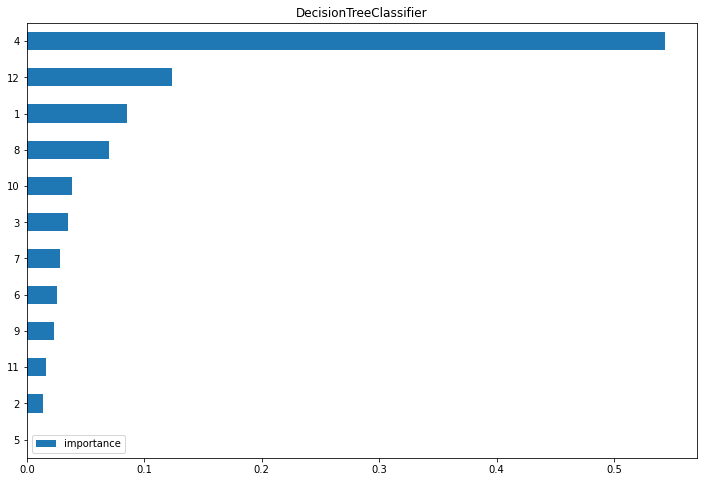

In [ ]:
imp = pd.DataFrame(best_clf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8), title='DecisionTreeClassifier')

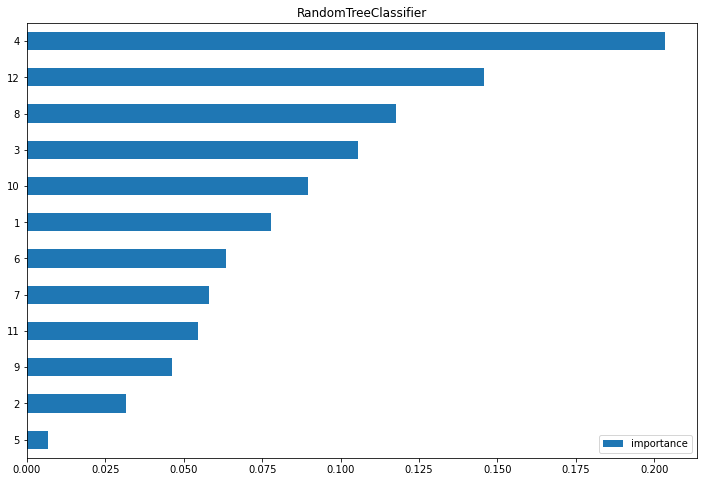

In [ ]:
imp = pd.DataFrame(best_for_clf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8), title='RandomTreeClassifier')

Как видим случайный лес использует больше хаарктеристик для предсказаний.

Что еще интересного можно сделать:


*   можно построить еще простенькие модели для любителей шоколада, заядлых курильщиков; 
*   можно построить модель предсказания алкоголизма, учитывая еще и пристрастие к сигаретам и определенным видам наркотиков, проранжировав соответствующие столбцы по шкале ("Никогда не прпинимал" - 0, "Принимал вчера" - 7);
*   так же можно предсказать употребление одного из видов наркотиков, учитывая другие виды, проранжировав как указано выше.




### **Задание №4**. Предположим, что мы построили рекомендательную систему, и ожидаем, что средний чек клиента вследствие этого должен вырасти. Мы провели AB-тест и собрали данные по контрольной и тестовой группе. Предложите и проведите статистический тест, который можно применить к этим данным.

В процессе выполнения задания разрешено пользоваться библиотеками scipy и statsmodels.

In [ ]:
import numpy as np

# Сгенерируем данные для задачи
control = np.random.lognormal(mean=5, sigma=2, size=(100000,))
test = np.random.lognormal(mean=5.04, sigma=2, size=(100000,))

Предлагается использовать критерий Стьюдента или t-тест. Вообще данный критерий применим для нормлаьно распределенных данных, но при таком коллиечтсве данных, которые мы имеем можно применить t-test.

H0 - в выборках нет значимого статистического различия.

Н1 - выборки статистически различны.

Импортируем соответствующую библиотеку.

In [ ]:
from scipy.stats import ttest_ind

Применяем t-тест.

In [ ]:
stat, t = ttest_ind(control, test)
print('Statistics=%.3f, p=%.3f' % (stat, t))

Statistics=0.618, p=0.537


При таком большем количестве данных, критическое значение t при уровне значимости 0.05 равно 1.96.

In [ ]:
t_cr = 1.96
if t > alpha:
	print('Принимаем нулевую гипотезу.')
else:
	print('Отклоняем нулевую гипотезу.')

Принимаем нулевую гипотезу.


Принимаем нулевую гипотезу, выборки не имеют статистического различия.

### **Задание №4 (*)**. В прошлом задании мы улавливали статистически значимое различие в средних в 0.04 единицы на выборке из 100000 клиентов. Насколько больше нам требуется собрать клиентов, чтобы уловить различие в 0.02?

Формула определения объема выборки выглядит так: $n=((t' * σ) / δ)^2 * 2$, 

где $t'$ - критическое значение стандартизованного нормального распределения, σ - cтандартное отклонение, δ - разность средних значений. Формула взята из книги  "Медико-биологическая статистика" Стентон Гланц. http://medstatistic.ru/articles/glantz.pdf

Для нашего анализа выберем $z = 1.96$, что соответсвутет 95% доверительному интервалу, σ = 2, разность средних значений 0.02.

In [ ]:
n = ((1.96 * 2) / 0.02) ** 2 * 2
n

76832.0

Количество наблюдений должно быть равно 76832.0.